1. 여성의 경우 평균적으로 나이가 높을수록, 높은 등급의 선실일수록 살 가능성이 높다.
2. 여성보다 남성이 살 가능성이 높다.
3. 1등실을 기준으로 
(나이최대값,배삯최대값): 살아남은 63세 여성과 80세 남성의 배값은 512, 
(나이최솟값,배삯최솟값): 살아남은 14세 여성과 1세정도의 아기의 배값은 25~26인것으로 보아 
나이를 기준으로 배값을 다르게 받았음을 알 수 있다.
4.1등실을 기준으로 여성의 평균 배삯이 남성보다 높음을 확인할 수 있는데 이는 테이블에서 아기/청소년의 경우 0원으로 표시된 부분이 있는 것으로 보아 여성의 배삯과 아기/청소년의 배삯이 함께 지불됐을 가능성도 있다고 추측할 수 있다.
5. 2,3등실의 가격은 크게 차이나지 않는 반면 1등실과의 가격은 크게 차이난다. 

Survived:  0은 죽었다는 의미, 1은 생존의 의미
Pclass : 좌석 등급
Name : 승객 이름
Age : 승객 나이
SibSp: 함께 탑승한 형제 자매 또는 배우자의 수
Parch: 함께 탑승한 부모, 아이의 수
Fare : 티켓 가격
Deck: 객실 번호
Embarked : 탑승 항구

In [69]:
# 과제
# Q. Titanic 데이터 셋에 대한 탐색을 통하여 주요한 그룹 조합별 인사이트 5개 이상을 도출하여 기술하세요.
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
titanic = sns.load_dataset('titanic')
df = titanic.copy()
df


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [72]:
# 0. 중복 제거, 결측값 제거 
df = df[['survived','pclass','sex','age','sibsp','parch','fare','embarked','deck']]
df.info()

df['age'].fillna(df['age'].mean(), inplace=True)
df['age'] = df.age.round(0)
df.age.unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  891 non-null    int64   
 1   pclass    891 non-null    int64   
 2   sex       891 non-null    object  
 3   age       891 non-null    float64 
 4   sibsp     891 non-null    int64   
 5   parch     891 non-null    int64   
 6   fare      891 non-null    float64 
 7   embarked  889 non-null    object  
 8   deck      203 non-null    category
dtypes: category(1), float64(2), int64(4), object(2)
memory usage: 57.0+ KB


array([22., 38., 26., 35., 30., 54.,  2., 27., 14.,  4., 58., 20., 39.,
       55., 31., 34., 15., 28.,  8., 19., 40., 66., 42., 21., 18.,  3.,
        7., 49., 29., 65.,  5., 11., 45., 17., 32., 16., 25.,  1., 33.,
       23., 24., 46., 59., 71., 37., 47., 70., 12.,  9., 36., 51., 56.,
       44., 61., 50., 62., 41., 52., 63., 43., 60., 10., 64., 13., 48.,
       53., 57., 80.,  6.,  0., 74.])

<AxesSubplot:xlabel='sex', ylabel='survived'>

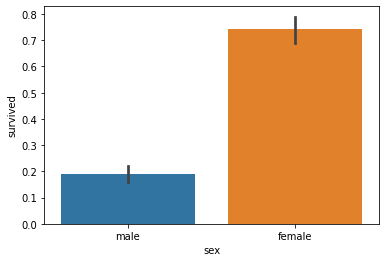

In [86]:
# 1-1 성별, 나이 & 객실 등급에 따른 생존률
tdf = pd.pivot_table(df,
                     index=['pclass'],
                     columns='sex',
                     values='survived',
                     aggfunc='mean')
tdf

sns.barplot(x='sex',y='survived',data=df)

# 여성일수록, 등급이 높을수록 살 확률이 높다

<AxesSubplot:xlabel='pclass', ylabel='survived'>

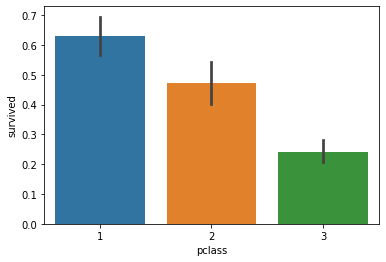

In [87]:
sns.barplot(x='pclass',y='survived',data=df)

In [77]:
# 1-2 성별, 나이, 객실 등급, 요금
tdf = pd.pivot_table(df,
                     index=['pclass','sex'],
                     columns='survived',
                     values=['age','fare'],
                     aggfunc='mean')
tdf

# 요금과 생존률은 크게 상관없다
#  1등석 : 여-나이많을수록, 남-나이어릴수록
#  2등석 : 여-나이어릴수록, 남-나이어릴수록
#  3등석 : 여-나이어릴수록, 남-나이어릴수록 살 가능성이 높다

age                   fare            
survived               0          1           0           1
pclass sex                                                 
1      female  25.666667  34.450549  110.604167  105.978159
       male    41.558442  35.555556   62.894910   74.637320
2      female  36.000000  28.128571   18.250000   22.288989
       male    33.098901  17.705882   19.488965   21.095100
3      female  25.263889  23.041667   19.773093   12.464526
       male    28.023333  23.744681   12.204469   15.579696

In [92]:
# 1-3 성별, 나이, 동행여부(형제/부모자식)
tdf = pd.pivot_table(df, 
                    index = ['pclass','sex'],
                    columns = 'survived',
                    values = 'sibsp',
                    aggfunc = 'mean')
print(tdf)
tdf = pd.pivot_table(df, 
                    index = ['pclass','sex'],
                    columns = 'sibsp',
                    values = 'survived',
                    aggfunc = 'mean')
tdf

# 1등실 : 여 -동반인이 2,3명일때 살 확률이 가장 높지만 전반적으로 살 확률이 높다
#      : 남 -동반인이 2명일때 살 확률이 가장 높다
# 2등실 : 여 -동반인이 2,3명일때 살 확률이 가장 높지만 대체로 살 확률이 높다
#      : 남 -전반적으로 살 확률이 낮다
# 3등실 : 여 -동반인이 없거나 1,2명일때 살 확률이 높고 그 이상이면 낮다
#      : 남 = 전반적으로 살 확률이 낮으며 사람이 많을수록 더 낮다.

# 1등실 : 여 -  0.54명일 때 살 혹률 가장 높음 , 남-0.37명일 때 살 확률이 높음

survived              0         1
pclass sex                       
1      female  0.666667  0.549451
       male    0.272727  0.377778
2      female  0.500000  0.485714
       male    0.307692  0.529412
3      female  1.291667  0.500000
       male    0.523333  0.340426


sibsp                 0         1         2      3         4    5    8
pclass sex                                                            
1      female  0.979592  0.950000  1.000000  1.000       NaN  NaN  NaN
       male    0.329545  0.483871  0.500000  0.000       NaN  NaN  NaN
2      female  0.931818  0.892857  1.000000  1.000       NaN  NaN  NaN
       male    0.118421  0.259259  0.200000    NaN       NaN  NaN  NaN
3      female  0.592593  0.447368  0.571429  0.125  0.333333  0.0  0.0
       male    0.129630  0.222222  0.125000  0.000  0.083333  0.0  0.0

In [110]:
# 1-4
tdf = pd.pivot_table(df,
                     index=['pclass','sex'],
                     columns='embarked',
                     values='survived')
tdf

# C,Q 항구에서 탄 승객이 살 비율이 S에서 탄 승객보다 높다.

embarked              C         Q         S
pclass sex                                 
1      female  0.976744  1.000000  0.958333
       male    0.404762  0.000000  0.354430
2      female  1.000000  1.000000  0.910448
       male    0.200000  0.000000  0.154639
3      female  0.652174  0.727273  0.375000
       male    0.232558  0.076923  0.128302

In [111]:
# 1-5
tdf = pd.pivot_table(df,
                     index=['pclass','sex'],
                     columns='deck',
                     values='survived')
tdf
# 1등실 A,B,D,E실에 탄 여성은 100프로 살았다
# E 객실에 탄 승객이 살 확률이 가장 높다. 

deck                  A    B         C         D         E     F    G
pclass sex                                                           
1      female  1.000000  1.0  0.888889  1.000000  1.000000   NaN  NaN
       male    0.428571  0.4  0.343750  0.461538  0.533333   NaN  NaN
2      female       NaN  NaN       NaN  1.000000  0.750000  1.00  NaN
       male         NaN  NaN       NaN  0.500000       NaN  0.75  NaN
3      female       NaN  NaN       NaN       NaN  1.000000  1.00  0.5
       male         NaN  NaN       NaN       NaN  1.000000  0.00  NaN

In [35]:
# 과제 2
# Q. auto-mpg 데이터에서 horsepower열의 고유값을 출력하세요.
# Q. horsepower 열의 누락 데이터를 삭제한 후 NaN 값의 갯수를 출력하세요.
# Q. horsepower의 타입을 실수형으로 변환한 후 자료형을 확인하고 auto_df.pkl로 저장 후 다시 불러와서 출력하세요

import pandas as pd 

auto_mpg = pd.read_csv('/Users/joy/cakd3/dataset/auto-mpg.csv')

#1
print('horsepower의 고유값','\n')
print(auto_mpg.horsepower.unique())  #어떤 애들이 있는지 확인해서 걸러줄 수 있음. 

# 숫자만 뽑아내기 - 정규표현식으로 뽑아내기
# df [df.horsepower.str.contains( '[0-9]+' ) ]

#2
auto_mpg.dropna(subset=['horsepower'],inplace=True)
auto_mpg = auto_mpg.replace('?', np.nan)
print('\n','horsepower의 NaN값확인','\n')
print(auto_mpg.isnull().sum())

#3
print('\n','horsepower의 자료값 확인','\n')
print(auto_mpg.horsepower.dtypes)
auto_mpg=auto_mpg.astype({'horsepower':float})
auto_mpg
print(auto_mpg.dtypes)

auto_mpg.to_pickle('/Users/joy/cakd3/dataset/auto-mpg.pkl')
auto_mpg =pd.read_pickle('/Users/joy/cakd3/dataset/auto-mpg.pkl')

auto_mpg.info()



horsepower의 고유값 

['130' '165' '150' '140' '198' '220' '215' '225' '190' '170' '160' '95'
 '97' '85' '88' '46' '87' '90' '113' '200' '210' '193' '?' '100' '105'
 '175' '153' '180' '110' '72' '86' '70' '76' '65' '69' '60' '80' '54'
 '208' '155' '112' '92' '145' '137' '158' '167' '94' '107' '230' '49' '75'
 '91' '122' '67' '83' '78' '52' '61' '93' '148' '129' '96' '71' '98' '115'
 '53' '81' '79' '120' '152' '102' '108' '68' '58' '149' '89' '63' '48'
 '66' '139' '103' '125' '133' '138' '135' '142' '77' '62' '132' '84' '64'
 '74' '116' '82']

 horsepower의 NaN값확인 

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

 horsepower의 자료값 확인 

object
mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: objec

In [30]:
# 과제 3
# Q. horsepower열의 최대값의 절대값으로 모든 데이터를 나누는 정규화를 수행한 후 통계요약표를 출력하세요
a = auto_mpg.horsepower.max()

b = auto_mpg.horsepower/abs(a)

print(b.head())

b.describe()

0    0.565217
1    0.717391
2    0.652174
3    0.652174
4    0.608696
Name: horsepower, dtype: float64


count    392.000000
mean       0.454215
std        0.167353
min        0.200000
25%        0.326087
50%        0.406522
75%        0.547826
max        1.000000
Name: horsepower, dtype: float64

In [11]:
# 과제 4
# origin 열의 고유값을 출력하세요.
# 정수형 데이터를 문자형 데이터로 변환한 후 고유값을 출력하세요.
# (1:'USA', 2:'EU', 3:'JAPAN')
print(auto_mpg.origin.unique())
print(auto_mpg.dtypes) #확인결과 int

print('\n','-----------------','\n')

auto_mpg = auto_mpg.astype({'origin':'object'})
auto_mpg = auto_mpg.replace({1:'USA',2:'EU',3:'JAPAN'})
print(auto_mpg.dtypes)

print('\n','-----------------','\n')

auto_mpg.origin.unique()

[1 3 2]
mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

 ----------------- 

mpg             float64
cylinders        object
displacement    float64
horsepower      float64
weight           object
acceleration    float64
model year       object
origin           object
car name         object
dtype: object

 ----------------- 



array(['USA', 'JAPAN', 'EU'], dtype=object)

In [36]:
# 과제5
# Q. origin 열의 자료형을 확인하고 범주형(category)으로 변환하여 출력하세요
print(auto_mpg.origin.dtype) #object로 나온다

print('\n','-----------------','\n')

auto_mpg = auto_mpg.astype({'origin':'category'})
print(auto_mpg.dtypes)

int64

 ----------------- 

mpg              float64
cylinders          int64
displacement     float64
horsepower       float64
weight             int64
acceleration     float64
model year         int64
origin          category
car name          object
dtype: object


In [13]:
# 과제 6
# Q.origin 열을 범주형에서 문자열로 변환한 후 자료형을 출력하세요. 
auto_mpg = auto_mpg.astype({'origin':'object'})
auto_mpg.dtypes

mpg             float64
cylinders        object
displacement    float64
horsepower      float64
weight           object
acceleration    float64
model year       object
origin           object
car name         object
dtype: object

In [46]:
# 과제7
# Q. horsepower를 3개의 bin으로 나누고 bin_names = ['저출력', '보통출력','고출력']으로 출력하세요.
# (np.histogram() 함수로 3개의 bin으로 나눔)
# https://wikidocs.net/23258

import numpy as np
from matplotlib import pyplot as plt

a = auto_mpg.horsepower
print('유니크값')
print(a.unique())
a =a.dropna().isnull().sum()


hist, b = np.histogram(a, bins=3)  #도수, 구분 = np.histogram(data, 도수분포구간 (bin))

bin_names = ['저출력','보통출력','고출력']
print('\n','도수 및 구분','\n')
print(hist) #도수는 도수분포표의 각 구간에 있는 data 수
print(b) #구분은 도수본포 구간

print('display','모르겠음')
display(b)
print()

auto_df['hp_bin'] = pd.cut(a,
                          bins=b,
                          labels=bin_names,
                          )

# # display(auto_df[['horsepower','hp_bin']],head())

유니크값
[130. 165. 150. 140. 198. 220. 215. 225. 190. 170. 160.  95.  97.  85.
  88.  46.  87.  90. 113. 200. 210. 193.  nan 100. 105. 175. 153. 180.
 110.  72.  86.  70.  76.  65.  69.  60.  80.  54. 208. 155. 112.  92.
 145. 137. 158. 167.  94. 107. 230.  49.  75.  91. 122.  67.  83.  78.
  52.  61.  93. 148. 129.  96.  71.  98. 115.  53.  81.  79. 120. 152.
 102. 108.  68.  58. 149.  89.  63.  48.  66. 139. 103. 125. 133. 138.
 135. 142.  77.  62. 132.  84.  64.  74. 116.  82.]

 도수 및 구분 

[0 1 0]
[-0.5        -0.16666667  0.16666667  0.5       ]
display 모르겠음


array([-0.5       , -0.16666667,  0.16666667,  0.5       ])

ValueError: Input array must be 1 dimensional

In [85]:
# 과제7
# Q. horsepower를 3개의 bin으로 나누고 bin_names = ['저출력', '보통출력','고출력']
# 으로 출력하세요.(np.histogram() 함수로 3개의 bin으로 나눔)
auto= pd.read_pickle('/Users/joy/cakd3/dataset/auto_df.pkl')
auto.dropna(subset=['horsepower'],axis=0,inplace=True)
count, bin_dividers = np.histogram(auto['horsepower'], bins=3)
display(bin_dividers)
print()
bin_names = ['저출력', '보통출력','고출력']

auto['hp'] = pd.cut(x=auto['horsepower'],
                           bins=bin_dividers,
                           labels=bin_names,
                           include_lowest=True)
display(auto[['horsepower','hp']])

FileNotFoundError: [Errno 2] No such file or directory: '/Users/joy/cakd3/dataset/auto_df.pkl'